In [9]:
%reload_ext autoreload
%autoreload 2

import brian2 as b2
import brian2hears as b2h

import dill
import matplotlib.pyplot as plt
import numpy as np


from analyze import sound_analysis as SA
from cochleas.consts import CFMAX, CFMIN
from utils.custom_sounds import Tone, WhiteNoise
from cochleas.anf_utils import TC_COC_KEY
from utils.log import logger, tqdm

from analyze.report import draw_spikes_single_pop, calculate_vector_strength_from_result, calculate_vector_strength_from_result_polar, draw_rate_vs_angle

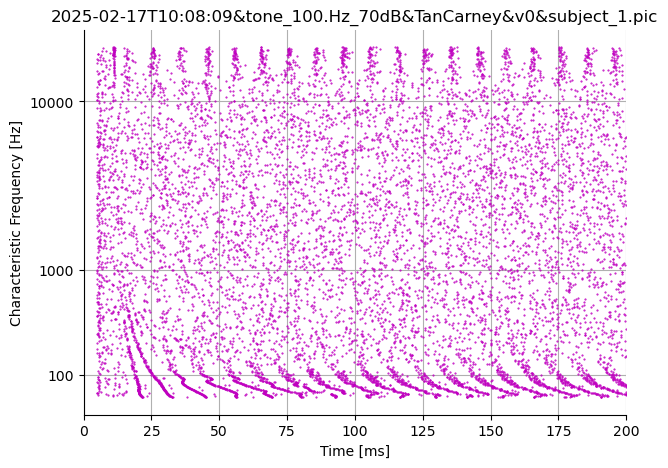

In [17]:
result_path = '/home/ubuntu/polithesis/results/anf_rasterplots/TanCarney&subject_1_few/2025-02-17T10:08:09&tone_100.Hz_70dB&TanCarney&subject_1.pic'
with open(result_path, "rb") as f:
    res = dill.load(f, ignore=True)

draw_spikes_single_pop(res, 0, 'L', 'MSO', y_ax = 'cf_custom')

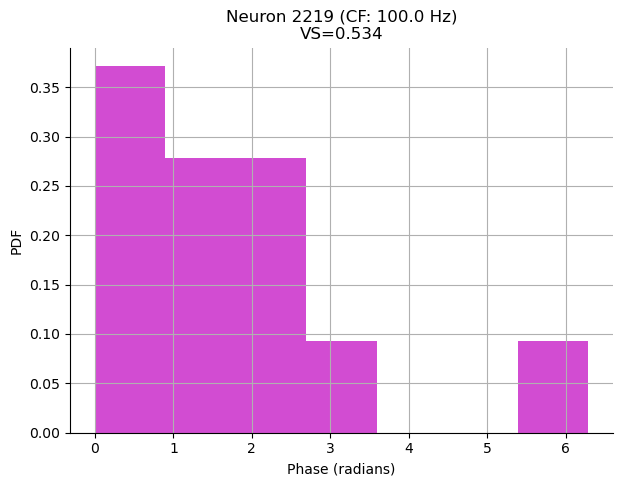

0.5335942939630298

In [15]:
calculate_vector_strength_from_result(res, 0, 'L', 'ANF', bandwidth=0, n_bins=7, display = True)

{'senders': array([    8,    23,   113, ..., 34360, 34490, 34689]), 'times': array([  0.4,   0.2,   0.2, ..., 199.6, 199.9, 200. ]), 'global_ids': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 

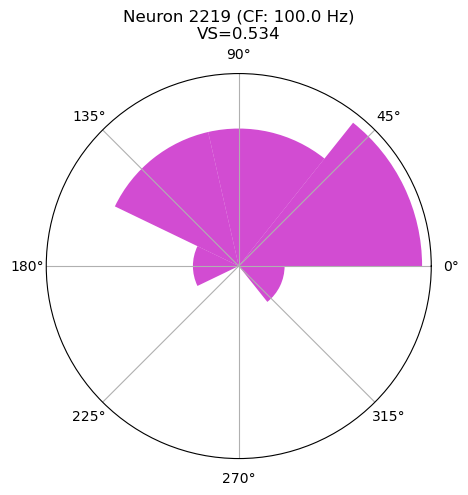

In [13]:
calculate_vector_strength_from_result_polar(res, 0, 'L', 'ANF', bandwidth=0, n_bins=7, display = True)

2025-02-27 15:54:06,104 [DEBUG]  {'title': 'All Populations', 'show_pops': ['parrot_ANF', 'GBC', 'SBC', 'LNTBC', 'MNTBC', 'LSO', 'MSO'], 'rate': False, 'hist_logscale': True}
2025-02-27 15:54:06,106 [DEBUG]  simulation time=1. s


pop: 100%|██████████| 7/7 [00:44<00:00,  6.30s/it]


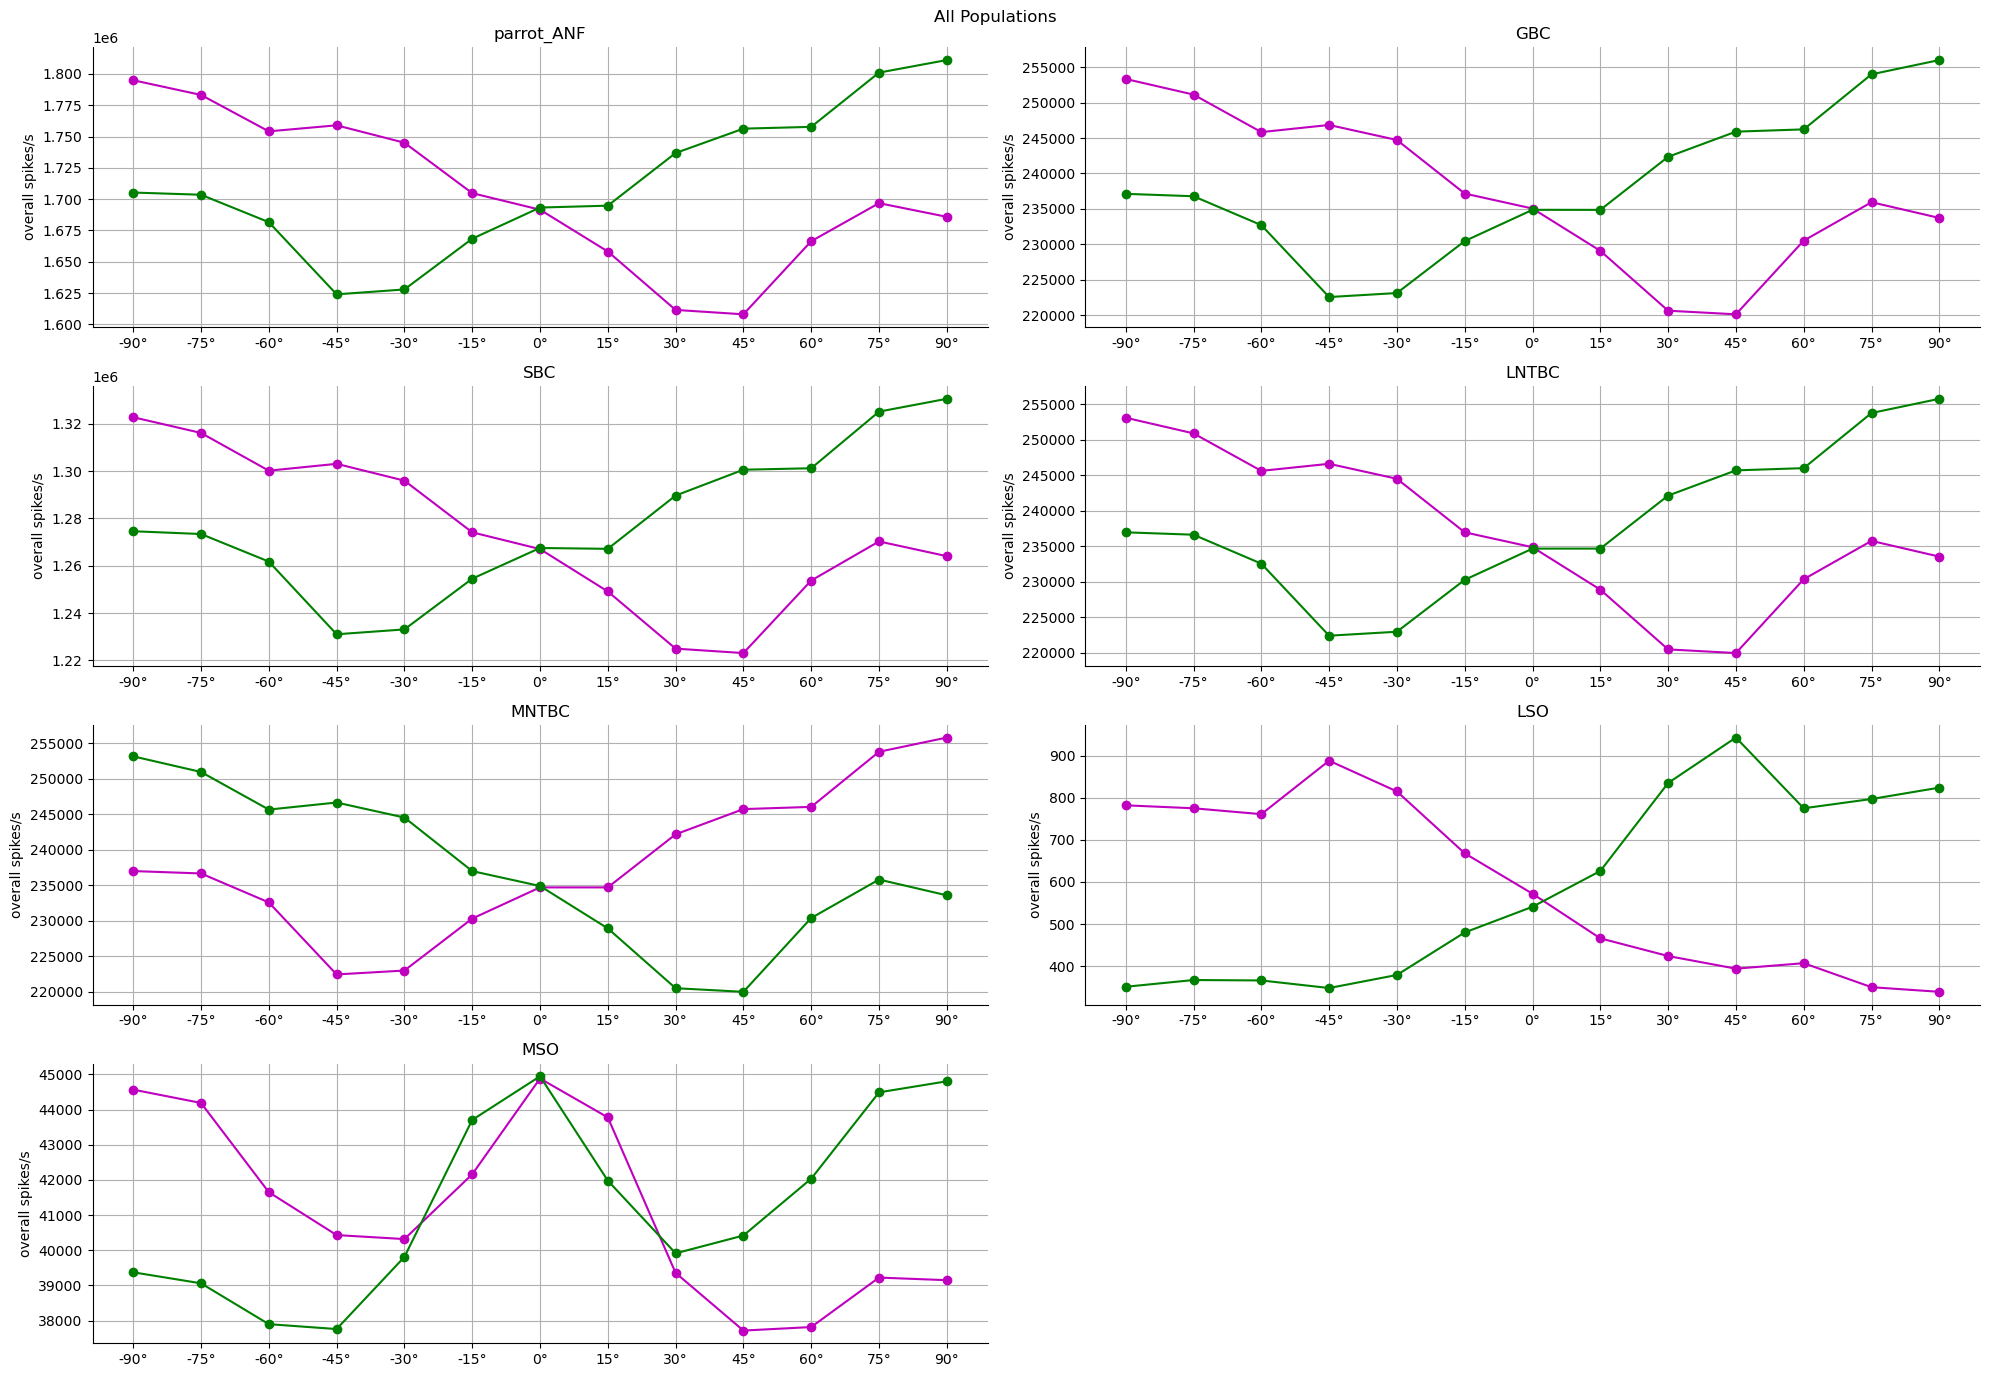

In [21]:
result_path = '/home/ubuntu/polithesis/results/angle2rates3/2025-02-26T13:17:23&tone_1.kHz_70dB&TanCarney&subject_1.pic'
with open(result_path, "rb") as f:
    res = dill.load(f, ignore=True)

draw_rate_vs_angle(
    res,
    "All Populations",
    rate=False,
    hist_logscale=True,
    show_pops= ["parrot_ANF", "GBC", "SBC", "LNTBC", "MNTBC", "LSO", "MSO"],
    show_hist=False
)